In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [2]:
filenames = glob.glob("data/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

In [3]:
def get_df(filename):
    return (pd
      .read_csv(filename, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(filename) for filename in filenames)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)

In [4]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
0,Sollin,100,Erdos-Renyi random,1,0,9838.101196,0
1,Sollin,100,Erdos-Renyi random,1,1,4058.248779,0
2,Sollin,100,Erdos-Renyi random,1,2,3943.625488,0
3,Sollin,100,Erdos-Renyi random,1,3,3487.000488,0
4,Sollin,100,Erdos-Renyi random,1,4,3196.748169,0


In [5]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
175,parallel sollin EL,10000,Erdos-Renyi random,32,5,1.429787e+06,0
176,parallel sollin EL,10000,Erdos-Renyi random,32,6,1.394350e+06,0
177,parallel sollin EL,10000,Erdos-Renyi random,32,7,1.368655e+06,0
178,parallel sollin EL,10000,Erdos-Renyi random,32,8,1.378994e+06,0
179,parallel sollin EL,10000,Erdos-Renyi random,32,9,1.381457e+06,0


In [6]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [7]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [8]:
summary

time                \
                                                  median          mean   
Algorithm          Max threads Graph nodes                               
Sollin             1           100          3.198209e+03  3.430273e+03   
                               1000         5.533633e+04  5.574461e+04   
                               10000        9.825330e+05  9.839480e+05   
parallel sollin AL 1           100          2.748436e+03  3.025202e+03   
                               1000         3.821907e+04  3.833014e+04   
                               10000        6.119396e+05  6.160422e+05   
                   2           100          4.356894e+03  4.548505e+03   
                               1000         3.199416e+04  3.303983e+04   
                               10000        5.435818e+05  5.587562e+05   
                   4           100          3.800261e+03  3.976795e+03   
                               1000         4.316314e+04  4.317072e+04   
                               10000        5.553105e+05  5.558962e+05   
                   8           100          4.165577e+03  4.304528e+03   
                               1000         4.519609e+04  4.519796e+04   
                               10000        5.452246e+05  5.487527e+05   
                   16          100          6.435639e+03  6.079187e+03   
                               1000         4.305248e+04  4.310881e+04   
                               10000        5.686035e+05  5.766004e+05   
                   32          100          7.653607e+03  7.707934e+03   
                               1000         6.353091e+04  6.350781e+04   
                               10000        7.169394e+05  7.190406e+05   
parallel sollin EL 1           100          8.056457e+03  7.959851e+03   
                               1000         4.976865e+04  5.018853e+04   
                               10000        4.688667e+05  4.714150e+05   
                   2           100          7.166924e+03  7.280126e+03   
                               1000         5.292049e+04  5.330651e+04   
                               10000        4.924040e+05  4.933114e+05   
                   4           100          9.206167e+03  9.232104e+03   
                               1000         6.257696e+04  6.327731e+04   
                               10000        7.971248e+05  7.640540e+05   
                   8           100          9.724632e+03  9.705939e+03   
                               1000         9.514372e+04  9.591119e+04   
                               10000        9.598431e+05  9.575176e+05   
                   16          100          1.128071e+04  1.122262e+04   
                               1000         1.064001e+05  1.066822e+05   
                               10000        1.075094e+06  1.075300e+06   
                   32          100          1.262710e+04  1.266711e+04   
                               1000         1.262547e+05  1.261540e+05   
                               10000        1.380225e+06  1.380190e+06   

                                                                        \
                                                     min           max   
Algorithm          Max threads Graph nodes                               
Sollin             1           100          3.180076e+03  4.058249e+03   
                               1000         5.501587e+04  5.859395e+04   
                               10000        9.721014e+05  9.983793e+05   
parallel sollin AL 1           100          2.688243e+03  5.001277e+03   
                               1000         3.795439e+04  3.898505e+04   
                               10000        6.101370e+05  6.300276e+05   
                   2           100          4.137573e+03  5.416238e+03   
                               1000         3.166528e+04  3.995282e+04   
                               10000        4.989784e+05  6.401288e+05   
                   4           100          3.489765e+0

In [9]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


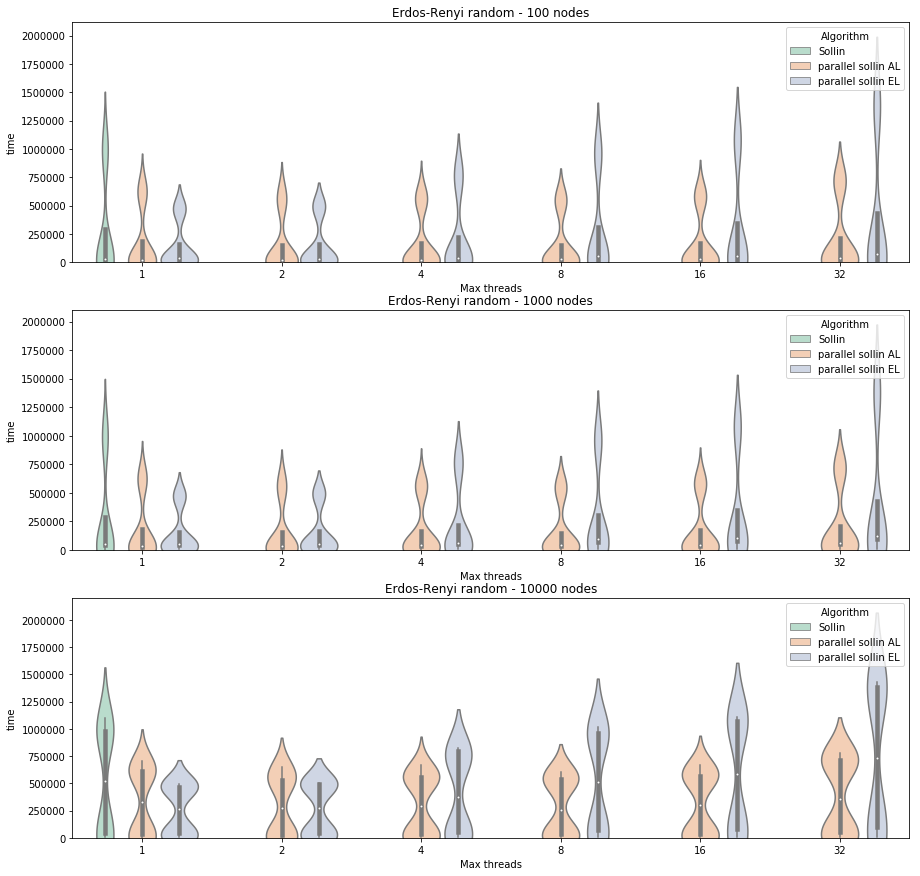

In [10]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(0,)

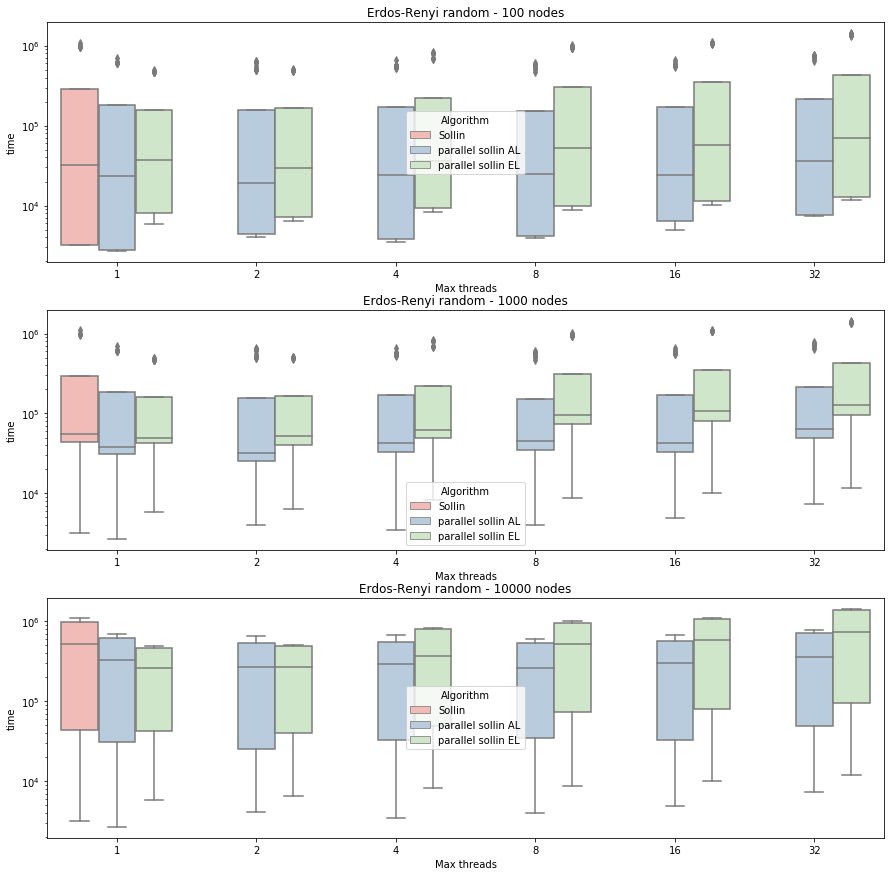

In [11]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")